In [70]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [71]:
# read the dataset into a dataframe
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,date,open,high,low,close,volume,qt_volume
0,0,2022-01-01 05:30:00,0.17097,0.17573,0.16625,0.17037,1.625696e+07,2.789346e+06
1,1,2022-01-02 05:30:00,0.17034,0.17374,0.16968,0.17311,4.151465e+06,7.130468e+05
2,2,2022-01-03 05:30:00,0.17316,0.17633,0.17069,0.17449,2.711845e+06,4.702266e+05
3,3,2022-01-04 05:30:00,0.17451,0.17451,0.16756,0.17028,2.917849e+06,4.974082e+05
4,4,2022-01-05 05:30:00,0.17033,0.17250,0.16671,0.16845,1.351238e+07,2.293770e+06


In [72]:

df['date'] = pd.to_datetime(df['date']).dt.date
df['time'] = pd.to_datetime(df['date']).dt.time

In [73]:
df.head(5)

,Unnamed: 0,date,open,high,low,close,volume,qt_volume,time
0,0,2022-01-01,0.17097,0.17573,0.16625,0.17037,1.625696e+07,2.789346e+06,00:00:00
1,1,2022-01-02,0.17034,0.17374,0.16968,0.17311,4.151465e+06,7.130468e+05,00:00:00
2,2,2022-01-03,0.17316,0.17633,0.17069,0.17449,2.711845e+06,4.702266e+05,00:00:00
3,3,2022-01-04,0.17451,0.17451,0.16756,0.17028,2.917849e+06,4.974082e+05,00:00:00
4,4,2022-01-05,0.17033,0.17250,0.16671,0.16845,1.351238e+07,2.293770e+06,00:00:00


In [74]:
# Here I start cleaning the data. Firstly, converting Timestamp to datetime64
df.date = pd.to_datetime(df.date, format='%Y/%m/%d')
# sets the index as the date
df.index = df.date
# Resamples the data to the average daily value of each column. Removes excessive frequency
df = df.resample('D').mean()
# drops any missing values that are present
df = df.dropna()
df.head()

,Unnamed: 0,open,high,low,close,volume,qt_volume
date,,,,,,,
2022-01-01,0.0,0.17097,0.17573,0.16625,0.17037,1.625696e+07,2.789346e+06
2022-01-02,1.0,0.17034,0.17374,0.16968,0.17311,4.151465e+06,7.130468e+05
2022-01-03,2.0,0.17316,0.17633,0.17069,0.17449,2.711845e+06,4.702266e+05
2022-01-04,3.0,0.17451,0.17451,0.16756,0.17028,2.917849e+06,4.974082e+05
2022-01-05,4.0,0.17033,0.17250,0.16671,0.16845,1.351238e+07,2.293770e+06


In [75]:
print(df.shape)
# Now we have 3,376 rows instead of 4 million - with no missing values and accurate datetime information

(120, 7)


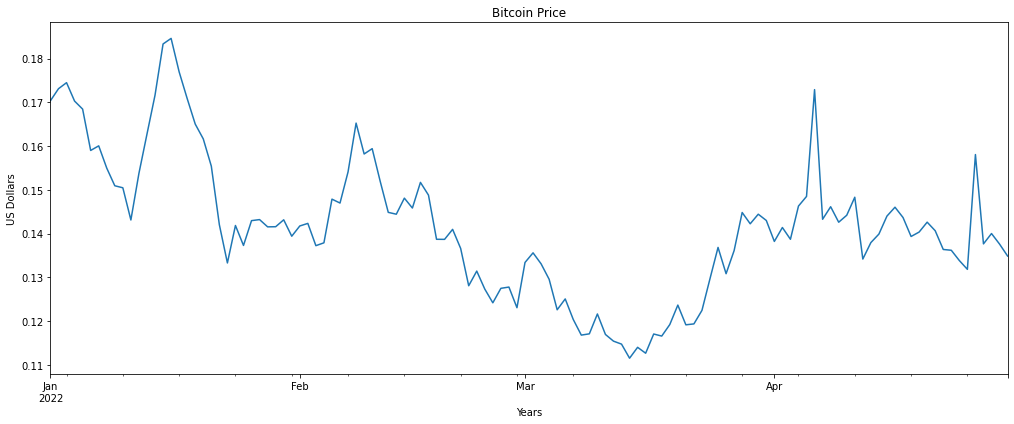

In [76]:
# graph bitcoin price over the years
df.close.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()
# As the graph shows 2017-2021 price behavior looks signficantly different than 2012-2017

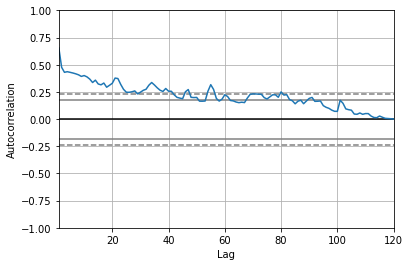

In [77]:
# Plot the autocorrelation to see if there are a large number of lags in the time series.
autocorrelation_plot(df)
plt.show()

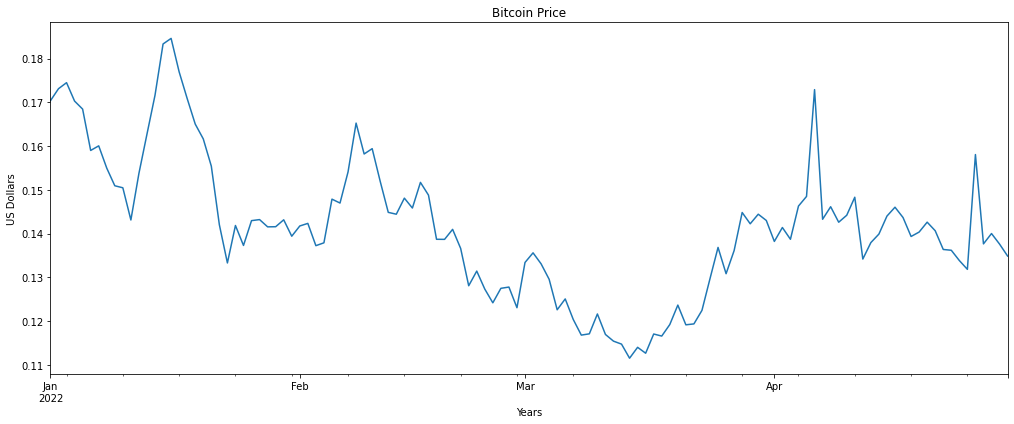

In [78]:
# let's look at the past 200 days to possibly adjust our data to this period
df.close.iloc[-200:].plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

In [79]:
# Since the first couple years of bitcoin don't properly represent the movement and volatility of the price -
# I decide to simply focus on the previous 4 years of data from March 31st, 2021.
df2 = df
# changes data to strictly to the previous 4 years, which is March 2017 to March 2021
df2 = df2.iloc[(-365*4):]
print(df2.shape)

(120, 7)


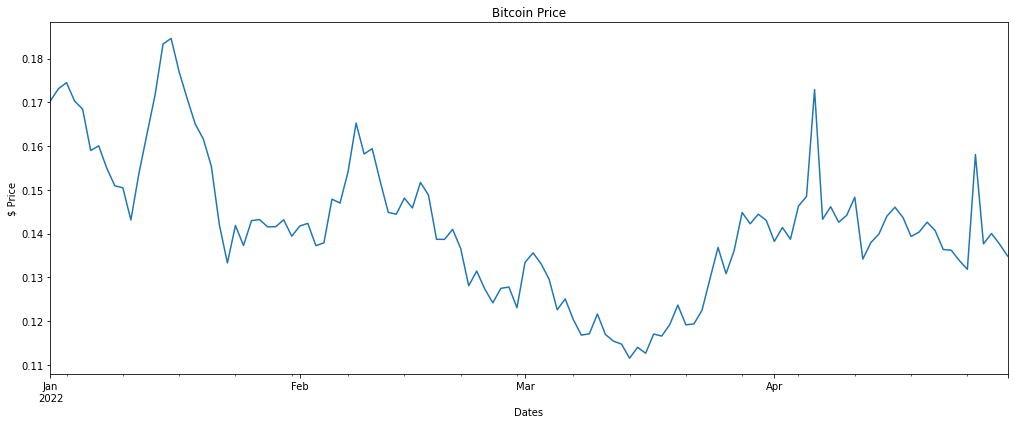

In [80]:
df2.close.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Dates')
plt.ylabel('$ Price')
plt.show()
# This data looks much more relevant for training a model. 
# However the recent spike will be involved in the testing data split - a tough prediction.

Test RMSE: 0.010


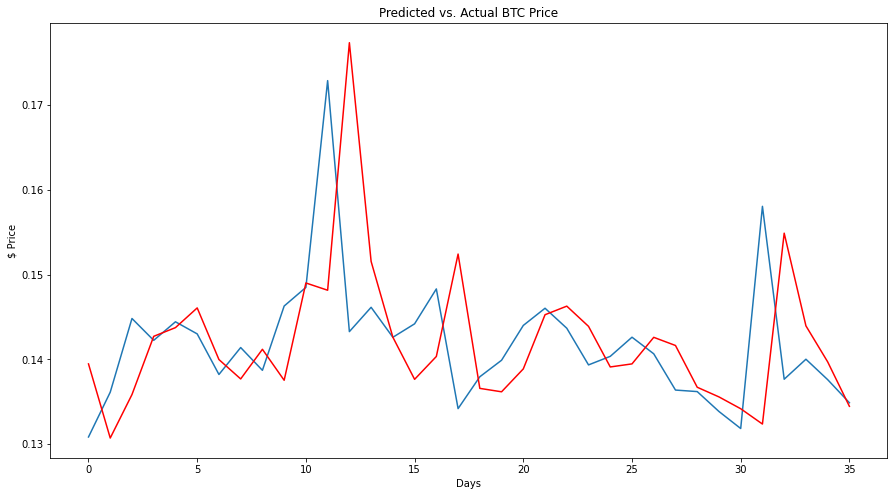

In [83]:
# if we look at this model, the predicted is indistinuishable from the actual price
# this is simply because it's predicting day by day.
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Actual BTC Price')
plt.show()

Test RMSE: 0.010


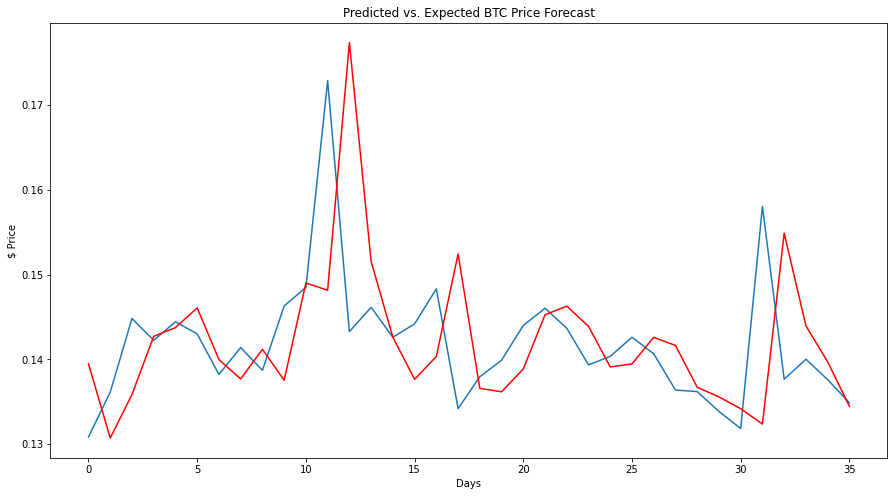

In [84]:
# I plot 50 days to more accurately see how the models works with its lag
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test[-50:])
plt.plot(predictions[-50:], color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Expected BTC Price Forecast')
plt.savefig("doge.png")